In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats
import sys
import numpy as np
import matplotlib.pyplot as plt 

sys.path.append("/home/salmon/workspace/SpDev/SpDB")
from spdm.util.logger import logger
from spdm.util.Profiles import Profile, Profiles

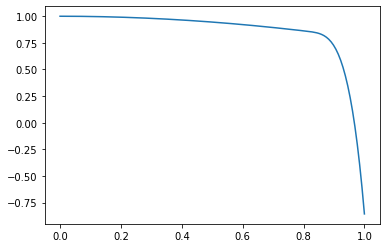

In [2]:
x=np.linspace(0,1.0,129)

rho_bdry=0.95
rho_src_bdry = 0.80
D_bdry=0.2

def s_edge(x):return 100*((x-rho_src_bdry)/(1.0-rho_src_bdry))**2

S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >=rho_src_bdry],[0,s_edge]), axis=x)

def int_s_edge(x ):return scipy.integrate.quad(s_edge,rho_src_bdry,x)[0]

int_S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >= rho_src_bdry], [0, lambda r:np.array([ int_s_edge(s) for s in r])]), axis=x)



def n_ped_prime(x): return scipy.integrate.quad(s_edge,rho_src_bdry,x )[0]

n_ped_bdr=((1-(rho_bdry/3)**2)**2) 

def n_core(x,  w=3): return ((1-(x/w)**2)**2) if x<rho_bdry else n_ped_bdr

def n_ped(s):return -scipy.integrate.quad(n_ped_prime,rho_src_bdry,s )[0] /D_bdry/n_ped_bdr if (s>rho_src_bdry) else 0  

ne=Profile(lambda x:n_core(x) *(1.0 + n_ped(x)) ,axis=x)

# ne = Profile([n_core(s) for s in  rho_tor_norm],axis=x,interpolator=scipy.interpolate.interp1d)
plt.plot(x,ne)

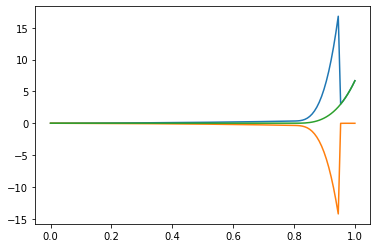

In [4]:
D = np.piecewise(x, [x < rho_bdry, x > rho_bdry], [lambda x:2.0 * D_bdry + (x**2), D_bdry])

d = Profile(D, axis=x )

plt.plot(x , -d*ne.derivative )

v=(d*ne.derivative+int_S_edge)/ne


plt.plot(x , v*ne )

plt.plot(x ,  int_S_edge)

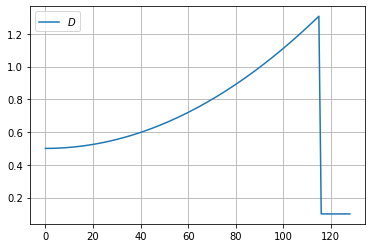

In [2]:
x=np.linspace(0.0,1.0,129)

n0=1.0e19

D_bdry=0.1
rho_bdry=0.9 

rho_src_bdry= 0.8

D=np.piecewise( x, [x < rho_bdry,x > rho_bdry], [lambda x:0.5+   (x**2 ), D_bdry])
# V=np.piecewise( x, [x < rho_bdry,x > rho_bdry], [lambda x:-(x**3)  , 0 ])

S_pel=Profile(scipy.stats.norm.pdf((x-0.7)/0.1)*np.sqrt(scipy.constants.pi*2.0) ,axis=x)


def s_edge(x):return 100*((x-rho_src_bdry)/(1.0-rho_src_bdry))**2

S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >=rho_src_bdry],[0,s_edge]), axis=x)

def int_s_edge(x ):return scipy.integrate.quad(s_edge,rho_src_bdry,x)[0]

int_S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >= rho_src_bdry], [0, lambda r:np.array([ int_s_edge(s) for s in r])]), axis=x)


d = Profile(D, axis=x)
# v = Profile(V, axis=x)
plt.plot(d,label=r"$D$")
# plt.plot(v, label=r"|v|")
plt.grid()
plt.legend()

In [3]:
def n_ped_prime(x): return scipy.integrate.quad(s_edge,rho_src_bdry,x )[0]

n_ped_bdr=((1-(rho_bdry/3)**2)**2) 

def n_core(x,  w=3): return ((1-(x/w)**2)**2) if x<rho_bdry else n_ped_bdr

def n_ped(s):return -scipy.integrate.quad(n_ped_prime,rho_src_bdry,s )[0] /D_bdry/n_ped_bdr if (s>rho_src_bdry) else 0  

n_e=Profile(lambda x:n_core(x) *(1.0 + n_ped(x)) ,axis=x)


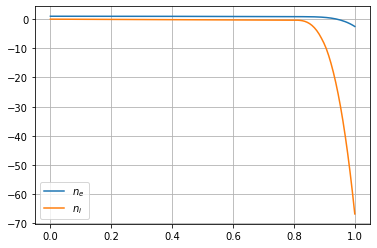

In [4]:
n_He=0.08 * (1-x**2)**2
n_Be=0.02*n_e
n_Ar=0.0005*n_e
n_i=n_e - (n_Be*4+n_Ar*18+n_He*2) 
# plt.plot(x,n_He,label=r"$n_{He}$" )
plt.plot(x,n_e,label=r"$n_e$" )
plt.plot(x,n_e.derivative,label=r"$n_i$" )
plt.legend()
plt.grid()

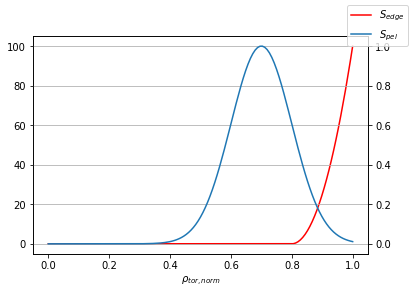

In [6]:

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$\rho_{tor,norm}$")
ax1.plot(x, S_edge,label=r"$S_{edge}$",color="r")
ax2 = ax1.twinx()
ax2.plot(x,S_pel,label=r"$S_{pel}$")
fig.legend()
plt.grid()

In [7]:
def int_s_edge(x ):return scipy.integrate.quad(s_edge,rho_src_bdry,x)[0]
int_S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >= rho_src_bdry], [0, lambda r:np.array([ int_s_edge(s) for s in r])]), axis=x)


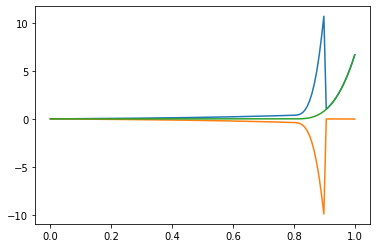

In [8]:
plt.plot(x , -d*n_e.derivative )
v=(d*n_e.derivative+int_S_edge)/n_e
plt.plot(x , v*n_e )
plt.plot(x ,  int_S_edge)


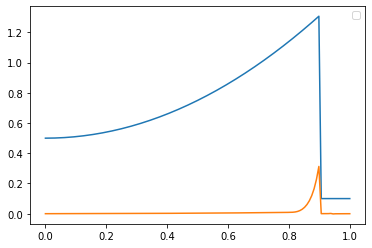

In [23]:
plt.plot(x, d)
plt.plot(x, -v/50)

plt.legend()

In [9]:
len(np.gradient(x)

129